# Domača naloga: Polona in Ančka

<center>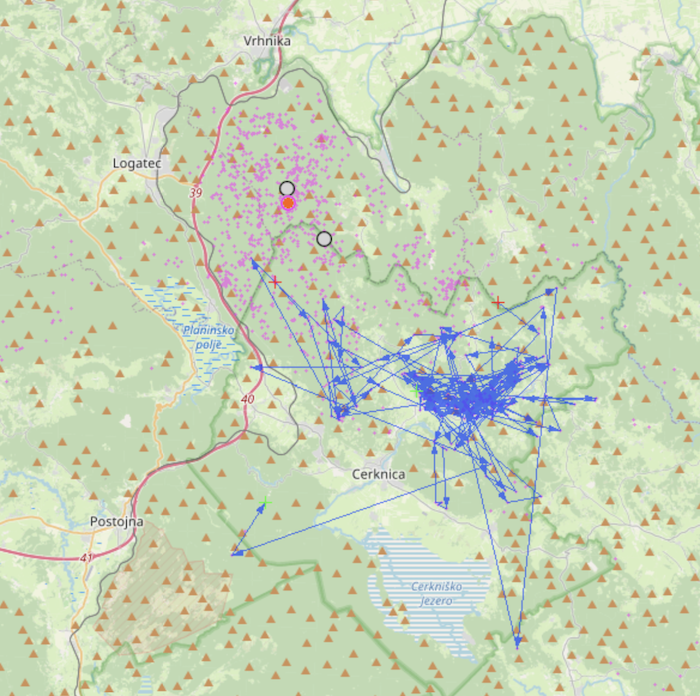
</center>

V tej nalogi bomo delali z resničnimi podatki.

Ančki in Poloni so nataknili GPS sledilnik in nekaj let opazovali, kod hodita. Podatke najdete v priloženi datoteki. Prvi stolpec je datum, naslednja dva sta zemljepisni koordinati Polone, naslednja dva pa koordinati Ančke. `nan` pomeni, da podatek ni znan: podatki namreč niso zabeleženi vsakodnevno, poleg tega so Poloni nataknili sledilnik par let kasneje kot Ančki. Če je za nekoga v nekem dnevu znana ena koordinata, je znana tudi druga.

Končni cilj naloge bo ugotoviti, na kateri dan sta si bili Ančka in Polona najbližje.

Podatki so bili zbrani v okviru študije Rjavi medved v Sloveniji 1993-1997 (Kaczensky, P., Knauer, F., Jonozovic, M., Blazic, M. (1999): Slovenian brown bear 1993-1999). Medvedki, ki so ju v študiji poimenovali Ančka in Polona sem izbral, ker imata največji presek dni, za katere obstajajo meritve.

Nekaj funkcij, ki vam bodo prišle prav:

- `np.min` in `np.max` sicer vrneta najmanjši in največji element tabele, vendar bosta vrnili `nan`, čim tabela vsebuje kak `nan`. V tem primeru je potebno uporabiti `np.nanmin` in `np.nanmax`, ki vrneta največji in najmanjši element, pri čemer ignorirate tiste, ki so `nan`.
- `np.nanargmin` in `np.nanargmax` sta podobna `np.argmin` in `np.argmax`, vendar ignorirata `nan`-e.
- `np.isnan` vrne `True` za elemente, ki so `nan`.
- `np.isfinite` vrne `True` za elemente, ki so običajna števila - torej tiste, ki niso `nan` ali `inf`.
- `np.sqrt` izračuna koren vseh elementov tabele.

V zapiskih se vam splača prebrati razdelek, v katerem smo računali, koliko je $\pi$.

Naloga navidez zahteva, da napišemo veliko funkcij. V resnici pa je zastavljena tako, da se dopolnjujejo - v večini je potrebno le spremeniti nekaj iz prejšnje. Tokrat se vaše funkcije ne bodo klicale med sabo.

**Vse funkcije je potrebno sprogramirati z uporabo `numpy`. Nobenih zank - nobenih `for` ali `while`. Vse funkcije brez prve bodo dolge le eno vrstico, saj bo vse delo opravil `numpy`. Testi tega še ne testirajo, vendar jih bomo verjetno dopolnili.**

### 1. `preberi_podatke`

Napiši funkcijo `preberi_podatke()`, ki prebere podatke iz datoteke `polona-in-ancka.csv` (datoteka naj bo v istem direktoriju kot tvoj program; odpre naj jo `open("polona-in-ancka.csv")`, brez kakšnih dodatnih poti!) ter vrne tri numpy-jeve tabele: tabelo z datumi ter tabeli z Poloninimi in Ančkimi koordinatami. Prva tabela bodo nizi, druga pa števila (`dtype` mora biti `float`). Polonini podatki so v stolpcih 1 in 2, če začnemo šteti od 0, Ančkini pa v 3 in 4.

#### Rešitev

Uporabimo `genfromtxt`. Kot tip ne pozabimo določiti nizov (dolžine do 20), `U20`, da ne bo bral le številk. Ločilo pa bo vejica. Skladno z navodili bomo vrnili tri tabele: vse bodo vsebovale vse vrstice, torej bo prvi indeks `:`. Prva bo vsebovala ničti stolpec prebrane tabele, druga prvega in drugega (`1:3`), tretje pa ostala dva (`3:`).

In [1]:
def preberi_podatke():
    t = np.genfromtxt("polona-in-ancka.csv", dtype="U20", delimiter=",")
    return t[:, 0], t[:, 1:3].astype(float), t[:, 3:].astype(float)

Študenti so to pogosto reševali takole:

In [2]:
def preberi_podatke():
    t = np.genfromtxt("polona-in-ancka.csv", dtype="U20", delimiter=",")
    datumi = t[:, 0]
    polona = t[:, 1:3].astype(float)
    ancka = t[:, 3:].astype(float)
    return datumi, polona, ancka

To je v resnici veliko lepše, saj koda te funkcije jasno pove, kaj funkcija vrača. Pa tudi lažje jo je brati, ker nimam dolgega izraza polnega nekih indeksov in rezin.

### 2. `meritev`

Napiši funkcijo `meritev(xy)`, ki prejme koordinate in pove, za koliko dni so le-te znane. (Če je znana ena, je tudi druga.) Za Polono obstaja 208 meritev, za Ano 350.

#### Rešitev

Ali je podatek znan (in ne `nan`), nam pove funkcija `isfinite`. Prešteti moramo vrstice, za katere vrne `True`. Ker vemo, da sta znana oba podatka ali pa nobeden, bomo prešteli le podatke v enem stolpcu - recimo ničtem.

In [3]:
def meritev(xy):
    return np.sum(np.isfinite(xy[:, 0]))

Druga možnost je, da preštejemo znane vrednosti v obeh stolpcih in to pač delimo z 2.

In [4]:
def meritev(xy):
    return np.sum(np.isfinite(xy)) // 2

Možno pa je, da se ne spomnimo na funkcijo `np.isfinite` temveč le na `np.isnan`. Ta vrne `True`, če je vrednost neznana. Znane so pač tiste, ki niso neznane: od dolžine tabele odštejemo števil vrstic z neznano vrednostjo,

In [5]:
def meritev(xy):
    return len(xy) - np.sum(np.isnan(xy)) // 2

### 3. `vzhod_zahod`

Napiši funkcijo `vzhod_zahod(xy)`, ki prejme koordinate in vrne najvzhodnejšo in najzahodnejšo zemljepisno dolžino v podatkih. Zemljepisna dolžina je druga koordinata in narašča proti vzhodu. Za Polono, recimo, je najvzhodnejša dolžina 14.4868167466, najzahodnejša pa 14.3361857993.

#### Rešitev

Koordinate v smeri vzhod-zahod so v prvem stolpcu, `xy[:, 1]`. Zanima nas največja in najmanjša, torej `max` in `min`, vendar so vmes tudi neznane vrednosti, zato uporabimo `nanmax` in `nanmin`.

In [6]:
def vzhod_zahod(xy):
    return np.nanmax(xy[:, 1]), np.nanmin(xy[:, 1])

Tule velja omeniti, da numpy ne porabi praktično nič časa, zato da iz tabele izvleče prvi stolpec. Pri tem ničesar ne kopira v novo tabelo: obe tabeli uporabljati isti pomnilnik, noben podatek se ne kopira nikamor, druga tabela je le drugačen pogled na iste podatke. Če ne bi bilo tako, bi bilo pametno pisati

In [7]:
def vzhod_zahod(xy):
    stolpec = xy[:, 1]
    return np.nanmax(stolpec), np.nanmin(stolpec)

Vendar - ni treba. Numpy je pameten.

### 4. `najvzhodnejša(xy)`

Napiši funkcijo `najvzhodnejša(xy)`, ki vrne koordinate (zemljepisno širino in dolžino) najbolj vzhodne točke v podatkih. Za Polono mora vrniti (45.8236039136, 14.4868167466). (Številko 14.4868..., najvzhodnejšo koordinato vrne tudi prejšnja funkcija. Ta mora vrniti pripadajočo zemljepisno širino.)

#### Rešitev

Prejšnjo funkcijo smo pisali predvsem kot uvod v tole - oziroma zato, da vidimo razliko. Tu nam ni dovolj poznati največjo številko, ki se pojavi v stolpcu (tako kot v prejšnji funkciji), temveč moramo vedeti, *na katerem indeksu* se pojavi, saj bomo morali vrniti tudi pripadajočo zamljepisno širino. Zato namesto `nanmax`, ki vrača največjo število, uporabimo `nanargmax`, ki vrne indeks elementa z največjim številom v stolpcu. Potem vrnemo celotno vrstico.

In [8]:
def najvzhodnejša(xy):
    return xy[np.nanargmax(xy[:, 1])]

Tole vrne vrstico, torej enodimenzionalno tabelo z dvema elementoma. Če bi radi, da vrne terko, jo pač pretvorimo.

In [9]:
def najvzhodnejša(xy):
    return tuple(xy[np.nanargmax(xy[:, 1])])

Testom je tule vseeno. Povem zato, ker vam morda kdaj ne bo.

### 5. `minrazdalja`

Napiši funkcijo `minrazdalja(xy, tocka)`, ki prejme zabeležene koordinate in koordinate neke točke. Vrniti mora najmanjšo razdaljo med temi zabeleženimi koordinatami in to točko. V nalogi se bomo delali, da je Zemlja ploščata in da imata koordinati enako skalo (torej, da je ena stopinja po širini enaka kot po višini) in lahko zato računamo kar evklidske razdalje ("po Pitagori").

Najkrajša razdalja med Polono in Prešernom (`[46.0513539,14.502127]`) je 0.1877726.

Če imamo torej medvedovi koordinati `(mx, my)` in točko `(tx, ty)`, je razdalja med medvedom in točko kar $\sqrt{(m_x - t_x)^2 + (m_y - t_y)^2}$. Nalogo reši tako, da od (vseh) medvedjih koordinat odšteješ koordinate točke, vse skupaj skvadriraš in sešteješ po vrsticah, potem izračunaš koren teh vsot in na koncu vrneš minimum (z `nanmin`).

#### Rešitev

Tole malo spominja na določanje $\pi$.

- Vzamemo tabelo `xy` in od vsake vrstice odštejemo `tocka`: `xy - tocka`. Elementi tako dobljene tabele bodo, $(x_i - t_x, y_i - t_y)$, če je $(x_i, y_i)$ i-ta vrstica, `(t_x, t_y)` pa koordinati točke.
- Razliko kvardriramo. Tako dobimo $\left(\left(x_i - t_x\right)^2, \left(y_i - t_y\right)^2\right)$.
- Seštejemo po vrsticah. To bo dalo enodimenzionalni "stolpec" z vrednostmi $\left(x_i - t_x\right)^2 + \left(y_i - t_y\right)^2$.
- Korenimo, da dobimo enodimenzionalni "stolpec" z vrednostmi $\sqrt{\left(x_i - t_x\right)^2 + \left(y_i - t_y\right)^2}$.
- In potem vrnemo `nanmin` tega stolpca.

In [10]:
def minrazdalja(xy, tocka):
    return np.nanmin(np.sqrt(np.sum((xy - tocka) ** 2, axis=1)))

### 6. `najblizja`

Napiši funkcijo najblizja(xy, tocka), ki je podobna prejšnji, vendar ne vrne minimalne razdalje temveč najbližjo točko. Za Polono in Prešerna vrne `(45.8675868, 14.4635502)`: Polona je bila najbližje sprehajalcem po Prešernovem trgu, ko je bila nekoč malo južno od Rakitne.

#### Rešitev

Zaradi te naloge smo delali 3 in 4 -- tretja je hotela samo maksimum, v četrti smo potrebovali indeks maksimalne vrednosti. Tule je podobno: naredimo vse tako kot prej, le da na koncu poiščempo le indeks vrstice, v kateri je razdalja minimalna. Potem vrnemo element originalne tabele, ki pripada temu indeksu.

In [11]:
def najblizja(xy, tocka):
    return xy[np.nanargmin(np.sum((xy - tocka) ** 2, axis=1))]

### 7. `minmedrazdalja`

Napiši funkcijo `minmedrazdalja(xy1, xy2)`, ki dobi tabelo s koordinatami dveh medvedov (torej celotni tabeli za vse dni beleženja) in vrne najmanjšo razdaljo, zabeleženo na isti dan. Najmanjša razdalja med Polono in Ančko je 0.07254133219635045). (Funkcija je presenetljivo (in še bolj) podobna funkciji `minrazdalja`)

#### Rešitev

Rešitev je

In [12]:
minmedrazdalja = minrazdalja

To je vse. Gre za eno in isto funkcijo. V `minrazdalja` smo podali vrstico in funkcija jo je odštela od vsake vrstice tabele. Tu namesto podamo celo tabelo, pa bo odštela tabelo od tabele. In naprej gre vse enako.

### 8. `dan_srecanja`

Napiši funkcijo `dan_srecanja(datumi, xy1, xy2)`, ki prejme tabelo z datumi in tabeli s koordinatama (v bistvu vse, kar vrača `preberi_podatke`) ter vrne datum, ko sta si bili Polona in Ančka najbližje. Pravilni odgovor je `"1998-06-23"`.

#### Rešitev

Tole pa je podobno sedmi: namesto `nanmin` vzamemo `nanargmin`, razlika je le v tem, da gremo s tem indeksom v tabelo datumov.

In [13]:
def dan_srecanja(datumi, xy1, xy2):
    return datumi[np.nanargmin(np.sqrt(np.sum((xy1 - xy2) ** 2, axis=1)))]

### Teaserji

Polona in Ančka sta se srečali v bližini nekega radarja. Predvsem Ančka ni bila daleč. Poišči Ančkine koordinate, vnesi v Google Earth, najdi radar. Potem si lahko prebereš kaj več o njem - je kar zanimivo. Radar si najbrž tudi že kdaj opazil(a), ko si se peljal(a) po avtocesti proti Logatcu.

#### Odgovor

Gre za [vojaški radar dolgega dosega na Ljubljanskem vrhu](https://sl.wikipedia.org/wiki/Ljubljanski_vrh) - kroglo, ki jo vidimo na hribu na desni strani, ko gremo od Vrhnike proti Logatcu. Do njega je lepo [kolesariti](https://runda.si/article/ljubljanski-vrh), posebej v času, ko zorijo maline (osebna izkušnja). Res pa kraji delujejo zelo medvedje.

### Podatki

Podatki so iz zbirke različnih podatkov o gibanju živali, ki jih najdemo na strani https://www.movebank.org/cms/webapp. V tej študiji nista le Ančka in Polona, temveč še 20 drugih medvedov in medvedk. Celotna, originalna datoteka je priložena testom, če koga, ki mu je blizu bolj rumen tisk, zanima, ali je imela Ančka kaj z Vinkom (ali pa se je Vinko bolj zanimal za Polono). (Ali pa, ojoj, za obe?)